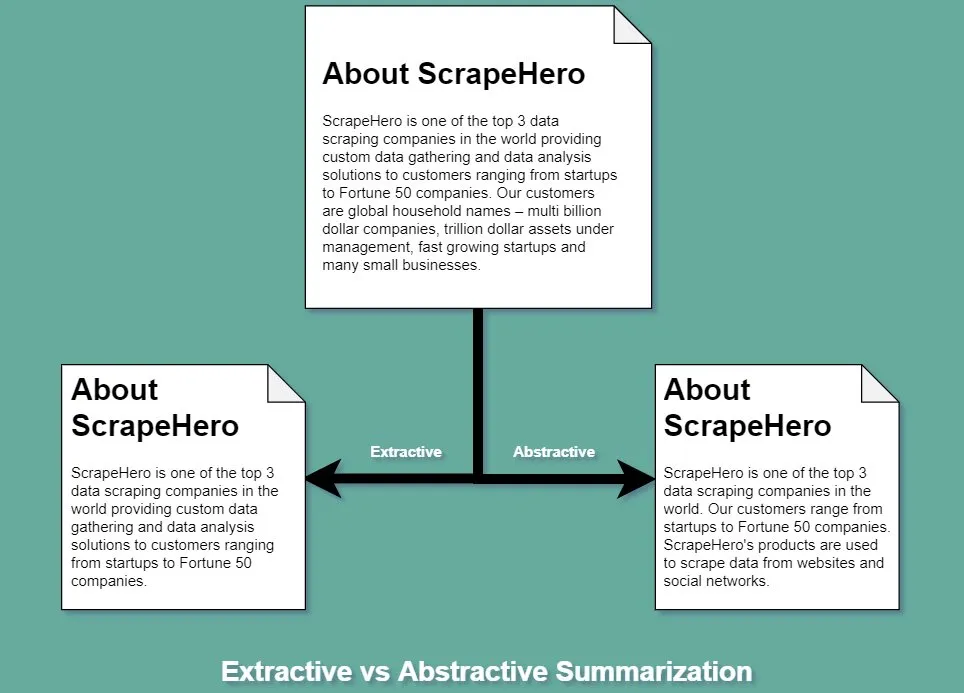



In [ ]:
#Unsupervised Classification
#Supervised Classification
#Transfer Learning: The intrinsic Model learning (weights - Biases - Parameters) are being used or transfered for a different task
  #- Pretrained Model - using it as such
  #- Finetuning Model - For your preferrence

In [1]:
!pip install sentence_transformers
!pip install -U transformers==3.0.0
!pip install nltk
!pip install nlp==0.2.0
!pip install pytorch_lightning

  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached transformers-3.0.0-py3-none-any.whl (754 kB)
  Using cached tokenizers-0.8.0rc4.tar.gz (96 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=331323f5d072cf1e1a2b6b5b5ba01db783fee30f202feb6d8cc3b8b6b4586851
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Success

In [2]:
!pip install neuralcoref==4.0
!pip install spacy==2.1.0
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 16.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for neuralcoref
  Running setup.py clean for neuralcoref
Failed to build neuralcoref
ERROR: Could not build wheels for neuralcoref, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 6.8 MB/s eta 0:00:00
  error: subprocess

In [5]:
text = """
India has made history as its Moon mission becomes the first to land in the lunar south pole region.
With this, India joins an elite club of countries to achieve a soft landing on the Moon, after the US, the former Soviet Union and China.
The Vikram lander from Chandrayaan-3 successfully touched down as planned at 18:04 local time (12:34 GMT).
Celebrations have broken out across the country, with Prime Minister Narendra Modi saying "India is now on the Moon".
We have reached where no other country could. It's a joyous occasion," he added. Mr Modi was watching the event live from South Africa where he is attending the Brics summit.
Indian Space Research Organisation (Isro) chief Sreedhara Panicker Somanath said the successful landing "is not our work alone, this is the work of a generation of Isro scientists".
India's achievement comes just days after Russia's Luna-25 spacecraft spun out of control and crashed into the Moon.
The crash also put the spotlight on how difficult it is to land in the south pole region where the surface is "very uneven" and "full of craters and boulders".
India's second lunar mission, which also attempted to soft-land there in 2019, was unsuccessful - its lander and rover were destroyed, though its orbiter survived.
On Wednesday, tense moments preceded the touchdown as the lander - called Vikram after Isro founder Vikram Sarabhai - began its precarious descent, carrying within its belly the 26kg rover named Pragyaan (the Sanskrit word for wisdom).
The lander's speed was gradually reduced from 1.68km per second to almost zero, enabling it to make a soft landing on the lunar surface.
In a few hours - scientists say once the dust has settled - the six-wheeled rover will crawl out of the lander's belly and roam around the rocks and craters on the Moon's surface, gathering crucial data and images to be sent to Earth.
"""

In [7]:
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import spacy
#import neuralcoref
from transformers import T5Tokenizer, T5ForConditionalGeneration,T5Config
import torch

In [8]:
model_sum = T5ForConditionalGeneration.from_pretrained("t5-small")

In [9]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=True`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [10]:
device = torch.device('cpu')

In [11]:
t5_prepared_text = "summarize: " + text
tokenized_text = tokenizer.encode(t5_prepared_text, return_tensors = 'pt').to(device)
summary_ids = model_sum.generate(tokenized_text,max_length = 1000,min_length = 30)
output = tokenizer.decode(summary_ids[0],skip_special_tokens=True)
output

'the Vikram lander from Chandrayaan-3 successfully touched down as planned. the success comes days after the lunar south pole crashed into the moon. the lander was destroyed, though its orbiter survived.'

In [14]:
from transformers import BertForQuestionAnswering, AutoTokenizer
modelname = 'deepset/bert-base-cased-squad2'
tokenizer_qa = AutoTokenizer.from_pretrained(modelname)

In [13]:
context = """India has made history as its Moon mission becomes the first to land in the lunar south pole region.
With this, India joins an elite club of countries to achieve a soft landing on the Moon, after the US, the former Soviet Union and China."""
question = "What did india achieve?"

In [15]:
model = BertForQuestionAnswering.from_pretrained(modelname)
nlp = pipeline('question-answering', model = model,tokenizer = tokenizer_qa)

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
nlp({
    'question':question,
    'context':context
})

{'score': 0.370273619890213,
 'start': 164,
 'end': 176,
 'answer': 'soft landing'}